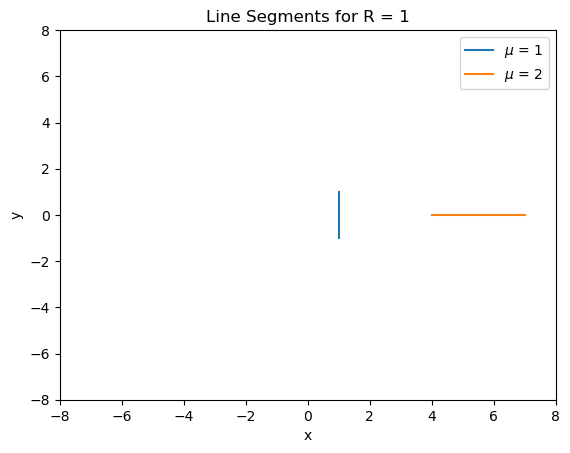

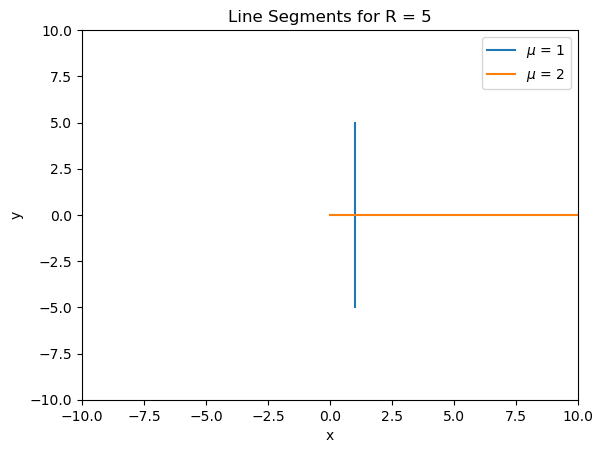

In [1]:
import matplotlib.pyplot as plt

# mu_1 =  
plt.plot([1, 1], [-1, 1], label='$\mu$ = 1')  
plt.plot([4, 7], [0, 0], label='$\mu$ = 2')   

plt.xlim(-8, 8)
plt.xlabel('x')
plt.ylim(-8, 8)
plt.ylabel('y')
plt.legend()
plt.title('Line Segments for R = 1')
plt.show()



plt.plot([1, 1], [-5, 5], label='$\mu$ = 1')  
plt.plot([0, 10], [0, 0], label='$\mu$ = 2')   

plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylim(-10, 10)
plt.ylabel('y')
plt.legend()
plt.title('Line Segments for R = 5')
plt.show()







[[  0 -10]
 [  0  -9]
 [  0  -8]
 [  0  -7]
 [  0  -6]
 [  0  -5]
 [  0  -4]
 [  0  -3]
 [  0  -2]
 [  0  -1]
 [  0   0]
 [  0   1]
 [  0   2]
 [  0   3]
 [  0   4]
 [  0   5]
 [  0   6]
 [  0   7]
 [  0   8]
 [  0   9]]


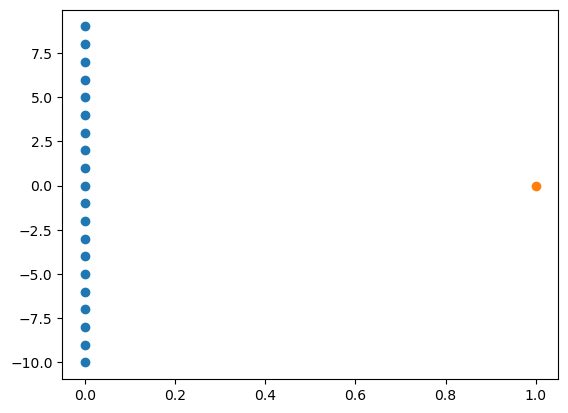

In [13]:
import numpy as np

w = np.array([1,0])

x1s = np.arange(-10,10)
x2s = np.arange(-10,10)
x_final = []

for x1 in x1s:
    for x2 in x2s:
        xarray = np.array([x1,x2])
        if np.dot(xarray, w) == 0:
            x_final.append(xarray)

x_final = np.array(x_final)
print(x_final)
plt.scatter(x_final[:,0], x_final[:,1])
plt.scatter(w[0], w[1])
plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


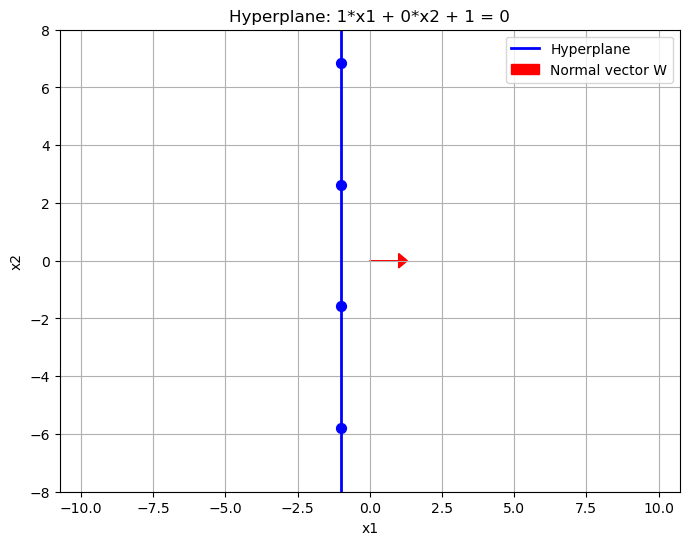

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define hyperplane
w = np.array([1, 0])
B = 1  # Add bias term

# More efficient: directly compute points on hyperplane
# For w = [1,0], hyperplane is x1 + B = 0, so x1 = -B
x1_values = np.full(20, -B)  # x1 = -3 for all points
x2_values = np.linspace(-10, 10, 20)  # x2 can be anything

# Plot hyperplane
plt.figure(figsize=(8, 6))
plt.plot(x1_values, x2_values, 'b-', linewidth=2, label='Hyperplane')

# Plot normal vector (scaled for visibility)
plt.arrow(0, 0, w[0], w[1], head_width=0.5, head_length=0.3, 
          fc='red', ec='red', label='Normal vector W')

# Plot some points on hyperplane
plt.scatter(x1_values[::4], x2_values[::4], color='blue', s=50)

plt.grid(True)
plt.axis('equal')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title(f'Hyperplane: {w[0]}*x1 + {w[1]}*x2 + {B} = 0')
plt.show()

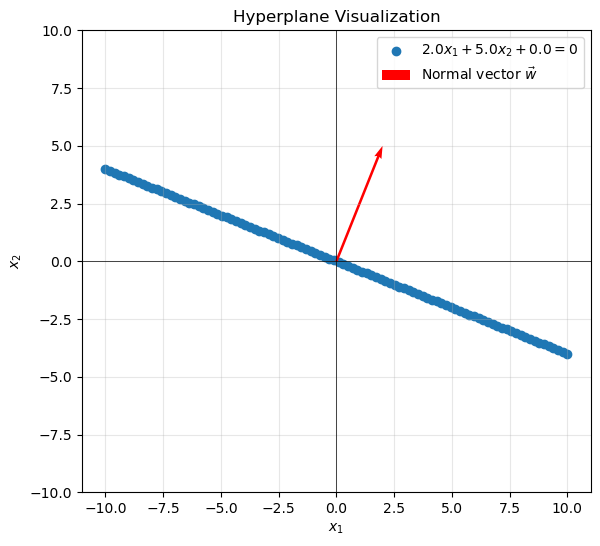

In [14]:
# w dot x + b = 0
# I want to write a function which will plot the hyperplane for a given w vec and B
# w1x1 + w2x2 + b = 0
# We have one degree of freedom, so we can write x2 in terms of x1?
# w1x1 + w2x2 + b = 0
# w1x1 + b = -w2x2
# - (w1x1 + b) / w2 = x2
#  
import numpy as np
import matplotlib.pyplot as plt
def eval_hp(w, b=1):
    x1 = np.linspace(-10,10,100)
    x2 = - (w[0] * x1 + b) / w[1] 
    return np.array([x1, x2]).T



example_w = [2, 5]
example_b = 0
hp = eval_hp(example_w, b=example_b)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(hp[:,0], hp[:,1], 
            label=f'${example_w[0]:.1f}x_1 + {example_w[1]:.1f}x_2 + {example_b:.1f} = 0$')
ax.quiver(0, 0, example_w[0], example_w[1], angles='xy', scale_units='xy', scale=1, 
                 color='red', width=0.005, label='Normal vector $\\vec{w}$')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
ax.set_ylim(-10,10)

ax.set_title('Hyperplane Visualization')
ax.set_aspect('equal')  # This is the key!


STEP-BY-STEP DERIVATION OF HYPERPLANE SLOPE
1. Start with hyperplane equation:
   w₁x₁ + w₂x₂ + b = 0

2. Solve for x₂ in terms of x₁:
   w₁x₁ + w₂x₂ + b = 0
   w₂x₂ = -w₁x₁ - b
   x₂ = (-w₁x₁ - b) / w₂
   x₂ = (-w₁/w₂)x₁ + (-b/w₂)

3. This is in the form: x₂ = mx₁ + c
   where m = slope = -w₁/w₂
   and c = y-intercept = -b/w₂

CONCRETE EXAMPLE:
w = [2, 5], b = 3
Hyperplane equation: 2x₁ + 5x₂ + 3 = 0

Slope = -w₁/w₂ = -2/5 = -0.4
Y-intercept = -b/w₂ = -3/5 = -0.6
Line equation: x₂ = -0.4x₁ + -0.6



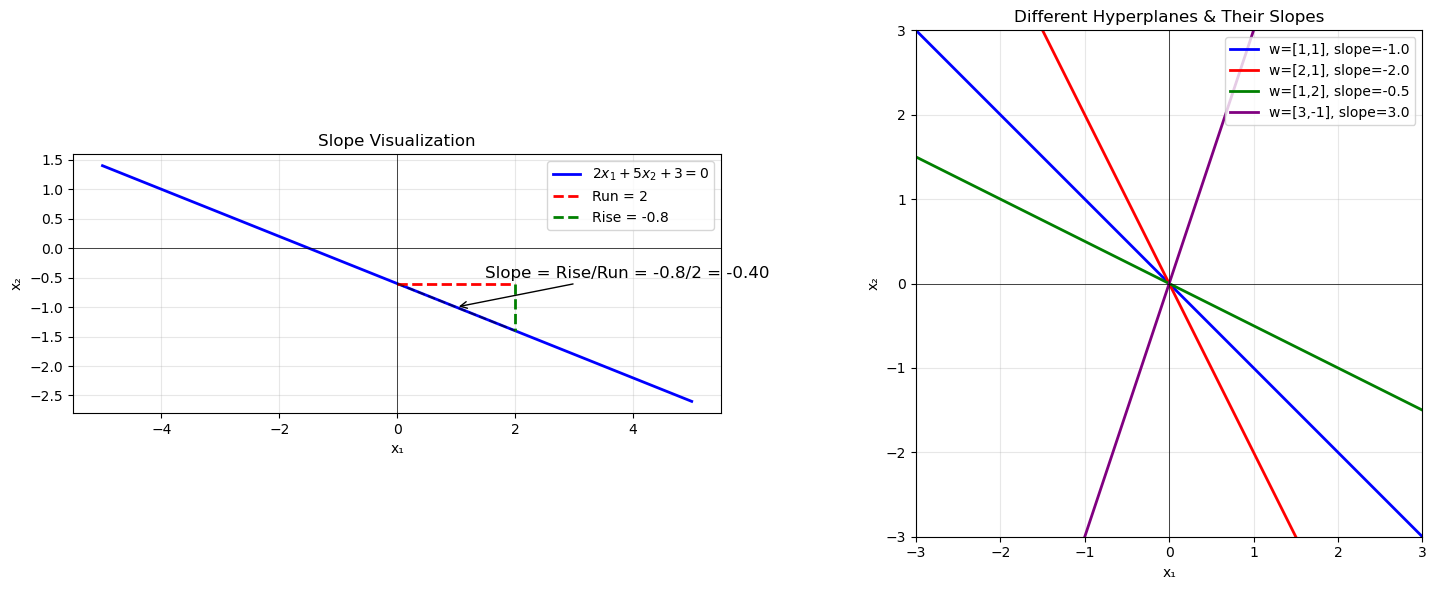

PATTERN RECOGNITION:
w = [ 1,  1] → slope = -1/1 =  -1.0
w = [ 2,  1] → slope = -2/1 =  -2.0
w = [ 1,  2] → slope = -1/2 =  -0.5
w = [ 3, -1] → slope = -3/-1 =   3.0

KEY INSIGHTS:
• The slope is ALWAYS -w₁/w₂
• If w₁ and w₂ have same sign → negative slope
• If w₁ and w₂ have opposite signs → positive slope
• Larger |w₁| relative to |w₂| → steeper slope
• The weight vector w = [w₁, w₂] encodes the slope information!


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Let's work through this step by step
print("STEP-BY-STEP DERIVATION OF HYPERPLANE SLOPE")
print("=" * 50)

# Start with the hyperplane equation
print("1. Start with hyperplane equation:")
print("   w₁x₁ + w₂x₂ + b = 0")
print()

# Solve for x₂ in terms of x₁
print("2. Solve for x₂ in terms of x₁:")
print("   w₁x₁ + w₂x₂ + b = 0")
print("   w₂x₂ = -w₁x₁ - b")
print("   x₂ = (-w₁x₁ - b) / w₂")
print("   x₂ = (-w₁/w₂)x₁ + (-b/w₂)")
print()

print("3. This is in the form: x₂ = mx₁ + c")
print("   where m = slope = -w₁/w₂")
print("   and c = y-intercept = -b/w₂")
print()

# Concrete example
w = [2, 5]  # w₁=2, w₂=5
b = 3

print("CONCRETE EXAMPLE:")
print(f"w = {w}, b = {b}")
print(f"Hyperplane equation: {w[0]}x₁ + {w[1]}x₂ + {b} = 0")
print()

slope = -w[0] / w[1]
intercept = -b / w[1]

print(f"Slope = -w₁/w₂ = -{w[0]}/{w[1]} = {slope}")
print(f"Y-intercept = -b/w₂ = -{b}/{w[1]} = {intercept}")
print(f"Line equation: x₂ = {slope}x₁ + {intercept}")
print()

# Visual demonstration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Show the algebra visually
x1_vals = np.linspace(-5, 5, 100)
x2_vals = slope * x1_vals + intercept

ax1.plot(x1_vals, x2_vals, 'b-', linewidth=2, 
         label=f'${w[0]}x_1 + {w[1]}x_2 + {b} = 0$')

# Show slope triangle
x1_point = 0
x2_point = intercept
x1_next = 2
x2_next = slope * x1_next + intercept

# Draw slope triangle
ax1.plot([x1_point, x1_next], [x2_point, x2_point], 'r--', linewidth=2, label='Run = 2')
ax1.plot([x1_next, x1_next], [x2_point, x2_next], 'g--', linewidth=2, 
         label=f'Rise = {x2_next - x2_point:.1f}')
ax1.plot([x1_point, x1_next], [x2_point, x2_next], 'k--', alpha=0.5)

ax1.annotate(f'Slope = Rise/Run = {x2_next - x2_point:.1f}/2 = {slope:.2f}', 
             xy=(1, (x2_point + x2_next)/2), xytext=(1.5, (x2_point + x2_next)/2 + 0.5),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=12, ha='left')

ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Slope Visualization')
ax1.legend()
ax1.set_aspect('equal')

# Plot 2: Compare different hyperplanes
examples = [
    ([1, 1], 0, 'blue'),    # slope = -1/1 = -1
    ([2, 1], 0, 'red'),     # slope = -2/1 = -2  
    ([1, 2], 0, 'green'),   # slope = -1/2 = -0.5
    ([3, -1], 0, 'purple'), # slope = -3/(-1) = 3
]

for w_ex, b_ex, color in examples:
    slope_ex = -w_ex[0] / w_ex[1]
    x2_ex = slope_ex * x1_vals + (-b_ex / w_ex[1])
    ax2.plot(x1_vals, x2_ex, color=color, linewidth=2,
             label=f'w=[{w_ex[0]},{w_ex[1]}], slope={slope_ex:.1f}')

ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Different Hyperplanes & Their Slopes')
ax2.legend()
ax2.set_aspect('equal')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

plt.tight_layout()
plt.show()

# Show the relationship between w and slope
print("PATTERN RECOGNITION:")
print("=" * 20)
for w_ex, b_ex, color in examples:
    slope_ex = -w_ex[0] / w_ex[1]
    print(f"w = [{w_ex[0]:2}, {w_ex[1]:2}] → slope = -{w_ex[0]}/{w_ex[1]} = {slope_ex:5.1f}")

print()
print("KEY INSIGHTS:")
print("• The slope is ALWAYS -w₁/w₂")
print("• If w₁ and w₂ have same sign → negative slope")
print("• If w₁ and w₂ have opposite signs → positive slope") 
print("• Larger |w₁| relative to |w₂| → steeper slope")
print("• The weight vector w = [w₁, w₂] encodes the slope information!")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def eval_hp(w, b=0):
    x1 = np.linspace(-10, 10, 100)
    x2 = -(w[0] * x1 + b) / w[1] 
    return np.array([x1, x2]).T

# Your example
example_w = [2, 5]
example_b = 0

# Create two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Without equal aspect ratio (like your original)
hp = eval_hp(example_w, example_b)
ax1.scatter(hp[:,0], hp[:,1], alpha=0.6, s=20,
            label=f'${example_w[0]:.1f}x_1 + {example_w[1]:.1f}x_2 + {example_b:.1f} = 0$')
ax1.quiver(0, 0, example_w[0], example_w[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, label='Normal vector $\\vec{w}$')

# Add some perpendicular lines to demonstrate
# Pick a point on the hyperplane
test_point = hp[50]  # Middle point
# Draw a short segment of the hyperplane direction
direction = np.array([1, -example_w[0]/example_w[1]])  # Direction vector of the line
direction = direction / np.linalg.norm(direction) * 2  # Normalize and scale

ax1.quiver(test_point[0], test_point[1], direction[0], direction[1], 
           angles='xy', scale_units='xy', scale=1, color='green', width=0.003,
           label='Hyperplane direction')

ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.legend()
ax1.set_title('Without Equal Aspect Ratio\n(Appears non-perpendicular)')

# Plot 2: With equal aspect ratio
ax2.scatter(hp[:,0], hp[:,1], alpha=0.6, s=20,
            label=f'${example_w[0]:.1f}x_1 + {example_w[1]:.1f}x_2 + {example_b:.1f} = 0$')
ax2.quiver(0, 0, example_w[0], example_w[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, label='Normal vector $\\vec{w}$')

ax2.quiver(test_point[0], test_point[1], direction[0], direction[1], 
           angles='xy', scale_units='xy', scale=1, color='green', width=0.003,
           label='Hyperplane direction')

ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.legend()
ax2.set_title('With Equal Aspect Ratio\n(Clearly perpendicular)')
ax2.set_aspect('equal')  # This is the key!

plt.tight_layout()
plt.show()

# Let's also verify mathematically
print("Mathematical verification:")
print(f"Weight vector w = {example_w}")
print(f"Hyperplane direction vector = [1, -w1/w2] = [1, {-example_w[0]/example_w[1]:.3f}]")
print(f"Dot product (should be 0): {example_w[0] * 1 + example_w[1] * (-example_w[0]/example_w[1])}")
print("If dot product = 0, vectors are perpendicular!")

# Show slope relationship
hyperplane_slope = -example_w[0] / example_w[1]
normal_slope = example_w[1] / example_w[0]
print(f"\nSlope relationships:")
print(f"Hyperplane slope: {hyperplane_slope:.3f}")
print(f"Normal vector slope: {normal_slope:.3f}")
print(f"Product of slopes: {hyperplane_slope * normal_slope:.3f}")
print("For perpendicular lines, product of slopes = -1")